In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/driver-application-status/TLC_New_Driver_Application_Status.csv


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [3]:
df=pd.read_csv('/kaggle/input/driver-application-status/TLC_New_Driver_Application_Status.csv')


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3496 entries, 0 to 3495
Data columns (total 12 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   App No                   3496 non-null   int64 
 1   Type                     3496 non-null   object
 2   App Date                 3496 non-null   object
 3   Status                   3496 non-null   object
 4   FRU Interview Scheduled  3496 non-null   object
 5   Drug Test                3496 non-null   object
 6   WAV Course               3496 non-null   object
 7   Defensive Driving        3496 non-null   object
 8   Driver Exam              3496 non-null   object
 9   Medical Clearance Form   3496 non-null   object
 10  Other Requirements       3496 non-null   object
 11  Last Updated             3496 non-null   object
dtypes: int64(1), object(11)
memory usage: 327.9+ KB


In [5]:
df.head()

,App No,Type,App Date,Status,FRU Interview Scheduled,Drug Test,WAV Course,Defensive Driving,Driver Exam,Medical Clearance Form,Other Requirements,Last Updated
0,6078403,HDR,07/16/2024,Incomplete,Not Applicable,Needed,Needed,Needed,Needed,Needed,Fingerprints needed; Copy of DMV license needed,07/17/2024 05:00:01 AM
1,6077989,HDR,07/09/2024,Incomplete,Not Applicable,Needed,Needed,Complete,Needed,Needed,Fingerprints needed; Copy of DMV license needed,07/17/2024 05:00:01 AM
2,6074279,HDR,05/09/2024,Incomplete,Not Applicable,Needed,Needed,Complete,Needed,Needed,Fingerprints needed; Copy of DMV license needed,07/17/2024 05:00:01 AM
3,5735329,HDR,10/17/2016,Incomplete,Not Applicable,Complete,Complete,Complete,Needed,Complete,Copy of DMV license needed,07/17/2024 05:00:01 AM
4,6077157,HDR,06/24/2024,Incomplete,Not Applicable,Complete,Complete,Complete,Needed,Complete,Not Applicable,07/17/2024 05:00:01 AM


In [6]:
df.shape

(3496, 12)

In [7]:
df.isnull().sum(axis=0)

App No                     0
Type                       0
App Date                   0
Status                     0
FRU Interview Scheduled    0
Drug Test                  0
WAV Course                 0
Defensive Driving          0
Driver Exam                0
Medical Clearance Form     0
Other Requirements         0
Last Updated               0
dtype: int64

In [8]:
df.dtypes

App No                      int64
Type                       object
App Date                   object
Status                     object
FRU Interview Scheduled    object
Drug Test                  object
WAV Course                 object
Defensive Driving          object
Driver Exam                object
Medical Clearance Form     object
Other Requirements         object
Last Updated               object
dtype: object

In [9]:
df['Status'].unique()


array(['Incomplete', 'Approved - License Issued', 'Denied',
       'Under Review', 'Pending Fitness Interview'], dtype=object)

In [10]:
from sklearn.preprocessing import OrdinalEncoder
categorical_columns = df.select_dtypes(include=['object']).columns

encoder = OrdinalEncoder()

df[categorical_columns] = encoder.fit_transform(df[categorical_columns])

In [11]:
df['Status'].unique()


array([2., 0., 1., 4., 3.])

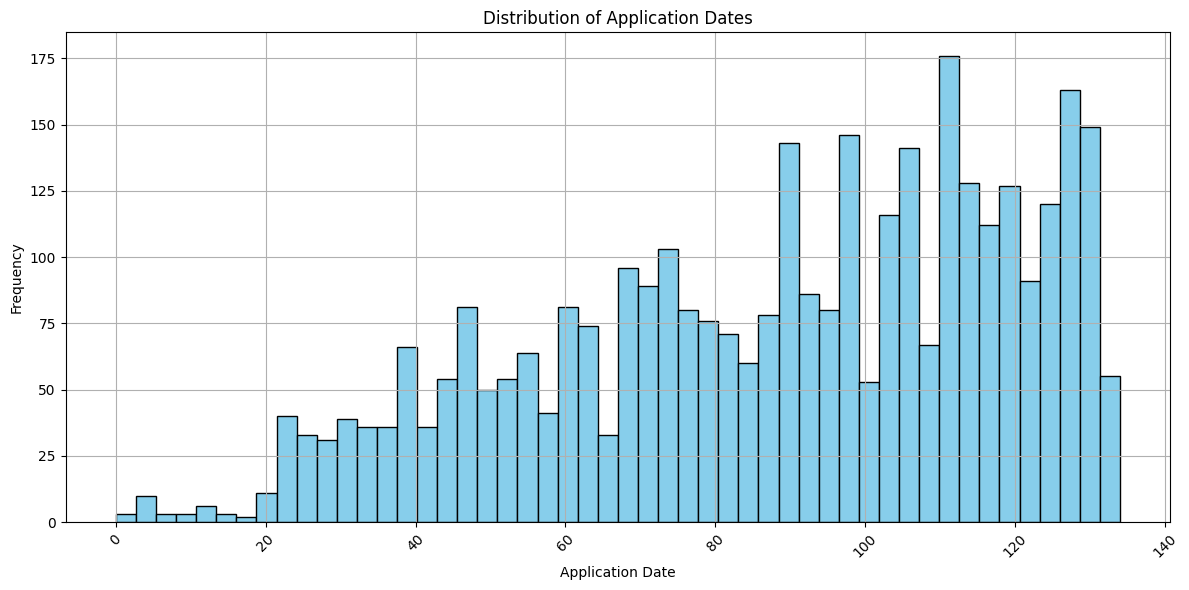

In [12]:
plt.figure(figsize=(12, 6))
plt.hist(df['App Date'], bins=50, color='skyblue', edgecolor='black')
plt.title('Distribution of Application Dates')
plt.xlabel('Application Date')
plt.ylabel('Frequency')
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()

plt.show()

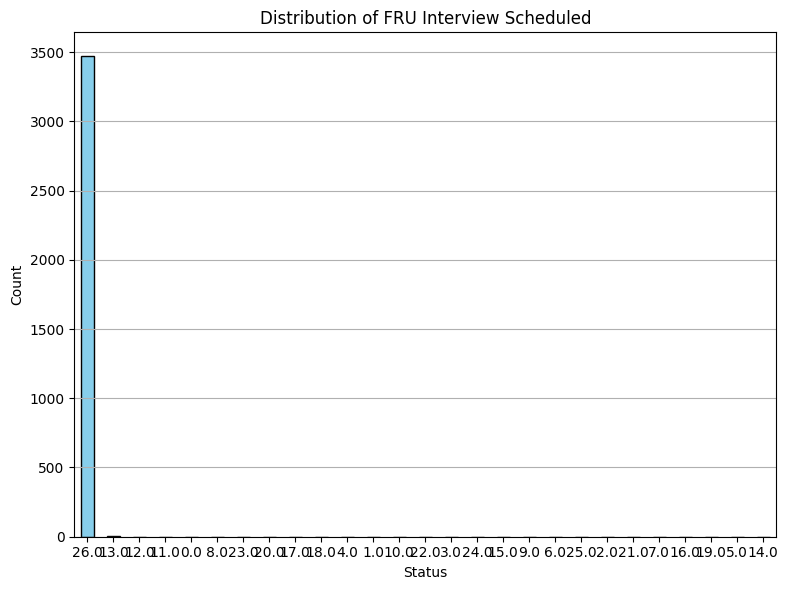

In [13]:
plt.figure(figsize=(8, 6))
df['FRU Interview Scheduled'].value_counts().plot(kind='bar', color='skyblue', edgecolor='black')
plt.title('Distribution of FRU Interview Scheduled')
plt.xlabel('Status')
plt.ylabel('Count')
plt.xticks(rotation=0)
plt.grid(axis='y')
plt.tight_layout()

plt.show()

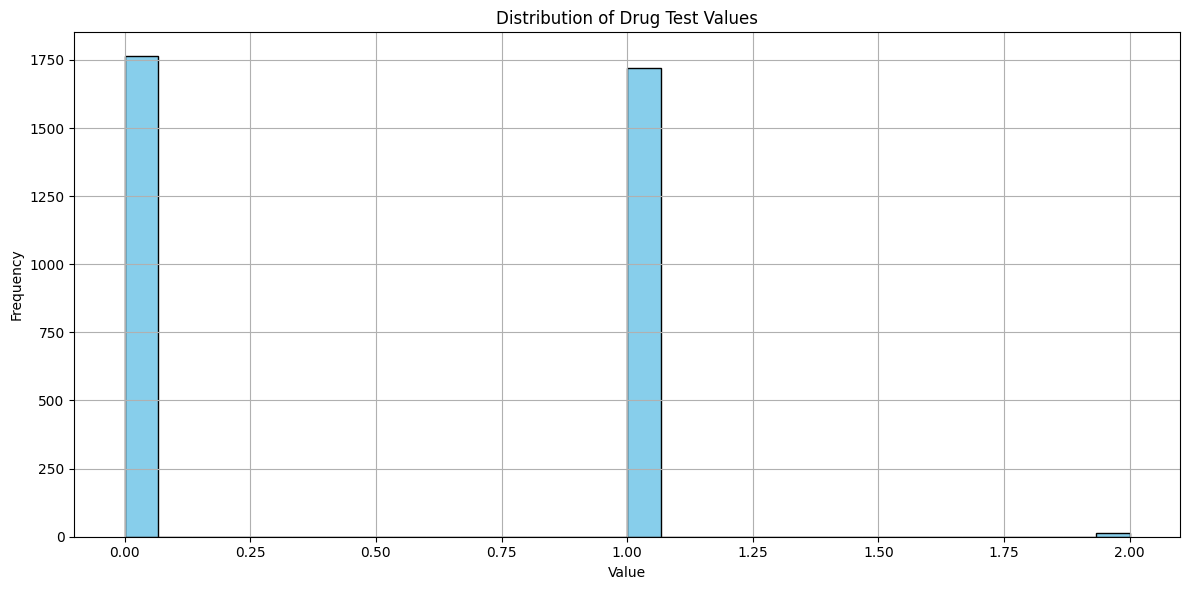

In [14]:
plt.figure(figsize=(12, 6))
plt.hist(df['Drug Test'].dropna(), bins=30, color='skyblue', edgecolor='black')
plt.title('Distribution of Drug Test Values')
plt.xlabel('Value')
plt.ylabel('Frequency')
plt.grid(True)
plt.tight_layout()

plt.show()

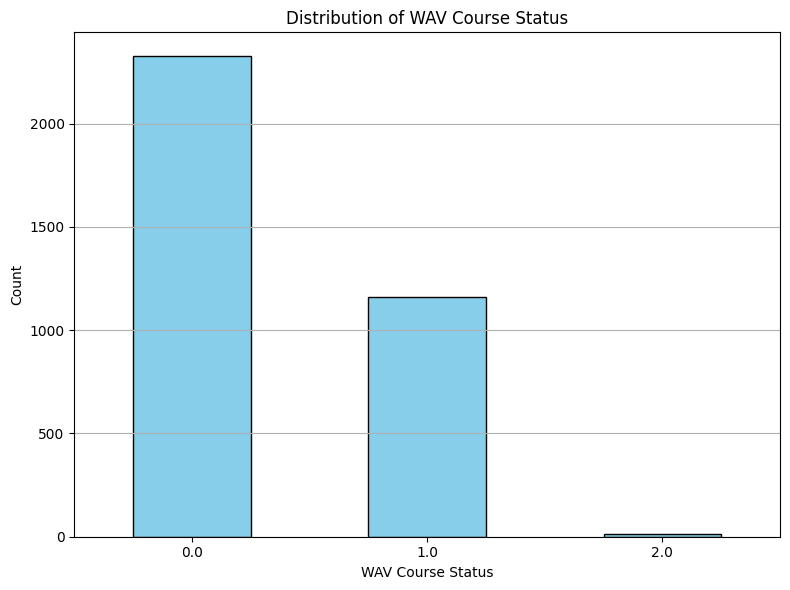

In [15]:
plt.figure(figsize=(8, 6))
df['WAV Course'].value_counts().plot(kind='bar', color='skyblue', edgecolor='black')
plt.title('Distribution of WAV Course Status')
plt.xlabel('WAV Course Status')
plt.ylabel('Count')
plt.xticks(rotation=0)
plt.grid(axis='y')
plt.tight_layout()

plt.show()

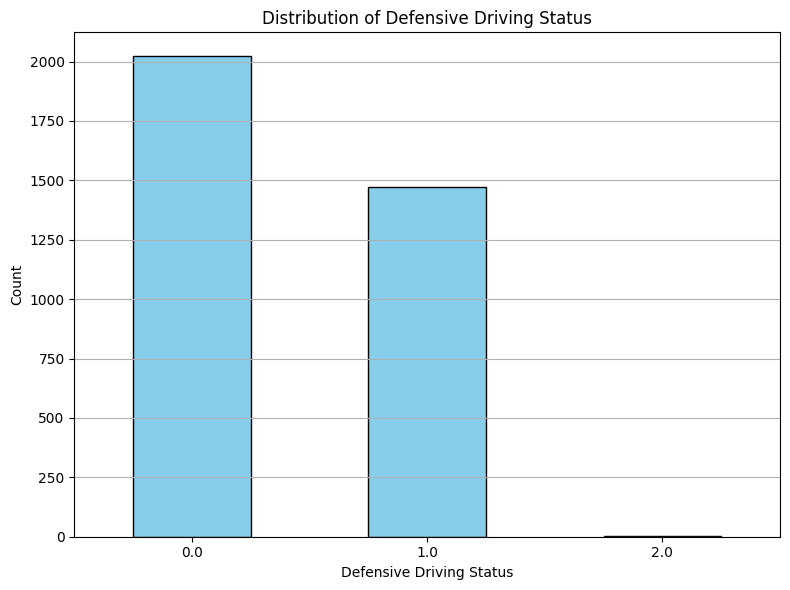

In [16]:
plt.figure(figsize=(8, 6))
df['Defensive Driving'].value_counts().plot(kind='bar', color='skyblue', edgecolor='black')
plt.title('Distribution of Defensive Driving Status')
plt.xlabel('Defensive Driving Status')
plt.ylabel('Count')
plt.xticks(rotation=0)
plt.grid(axis='y')
plt.tight_layout()

plt.show()

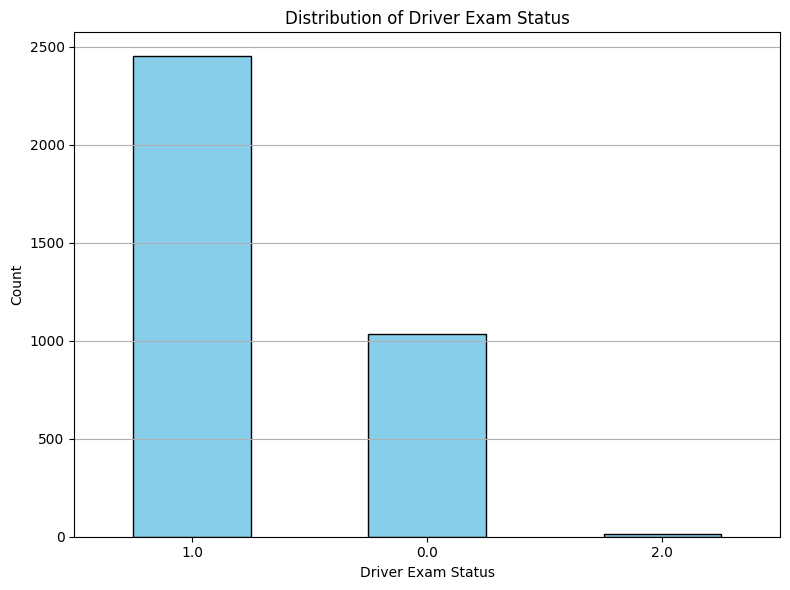

In [17]:
plt.figure(figsize=(8, 6))
df['Driver Exam'].value_counts().plot(kind='bar', color='skyblue', edgecolor='black')
plt.title('Distribution of Driver Exam Status')
plt.xlabel('Driver Exam Status')
plt.ylabel('Count')
plt.xticks(rotation=0)
plt.grid(axis='y')
plt.tight_layout()

plt.show()

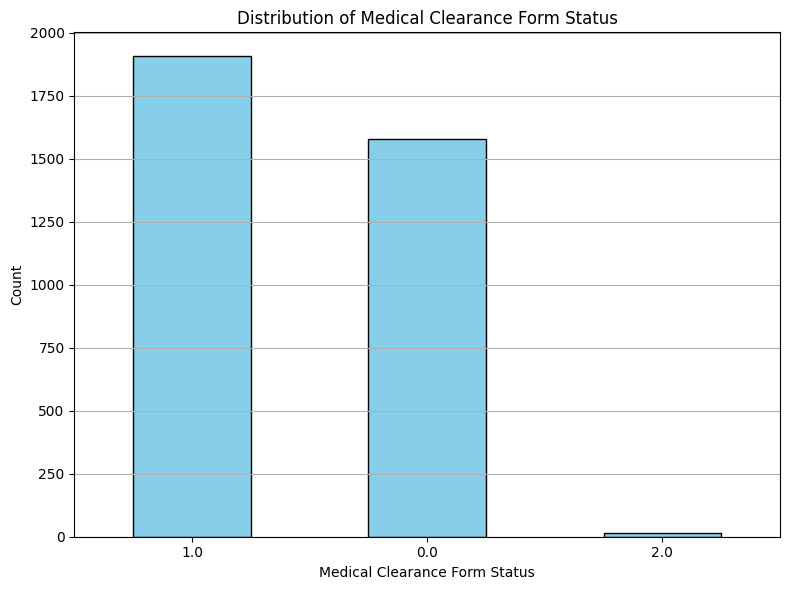

In [18]:
plt.figure(figsize=(8, 6))
df['Medical Clearance Form'].value_counts().plot(kind='bar', color='skyblue', edgecolor='black')
plt.title('Distribution of Medical Clearance Form Status')
plt.xlabel('Medical Clearance Form Status')
plt.ylabel('Count')
plt.xticks(rotation=0)
plt.grid(axis='y')
plt.tight_layout()

plt.show()

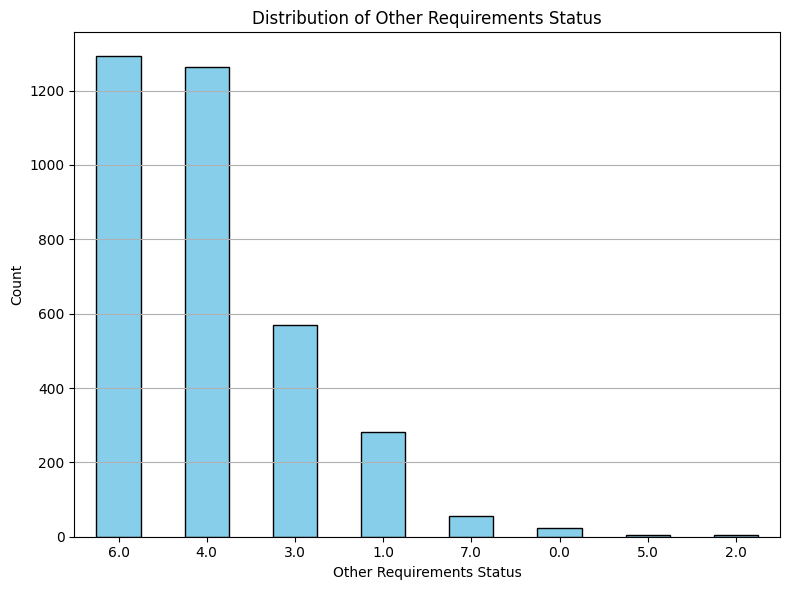

In [19]:
plt.figure(figsize=(8, 6))
df['Other Requirements'].value_counts().plot(kind='bar', color='skyblue', edgecolor='black')
plt.title('Distribution of Other Requirements Status')
plt.xlabel('Other Requirements Status')
plt.ylabel('Count')
plt.xticks(rotation=0)
plt.grid(axis='y')
plt.tight_layout()

plt.show()

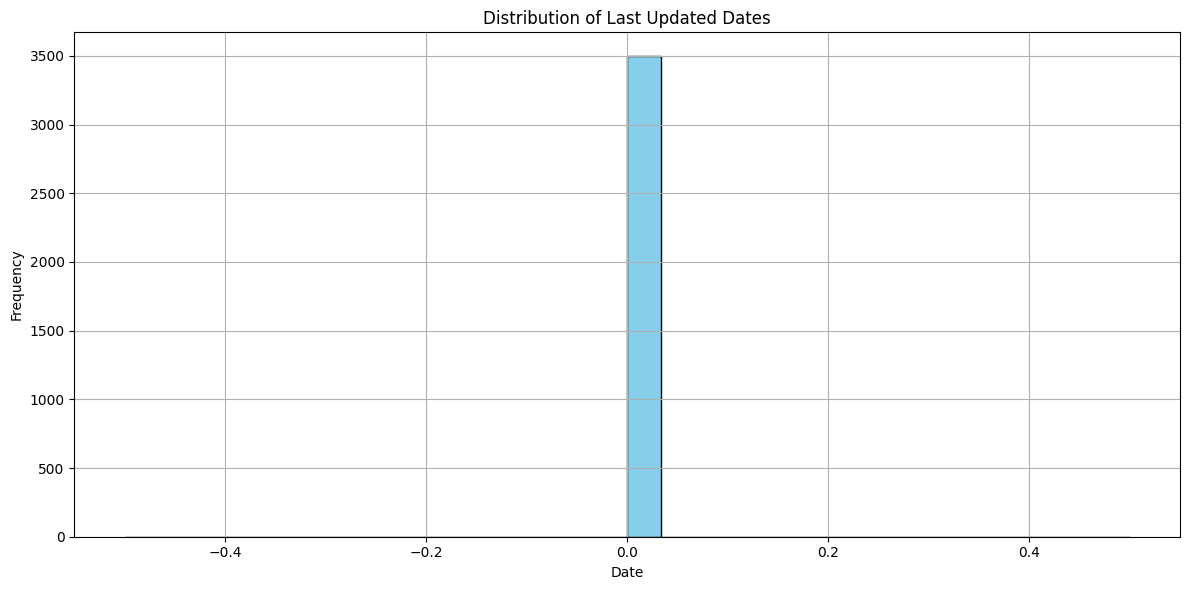

In [20]:
plt.figure(figsize=(12, 6))
df['Last Updated'].hist(bins=30, color='skyblue', edgecolor='black')
plt.title('Distribution of Last Updated Dates')
plt.xlabel('Date')
plt.ylabel('Frequency')
plt.grid(True)
plt.tight_layout()

plt.show()

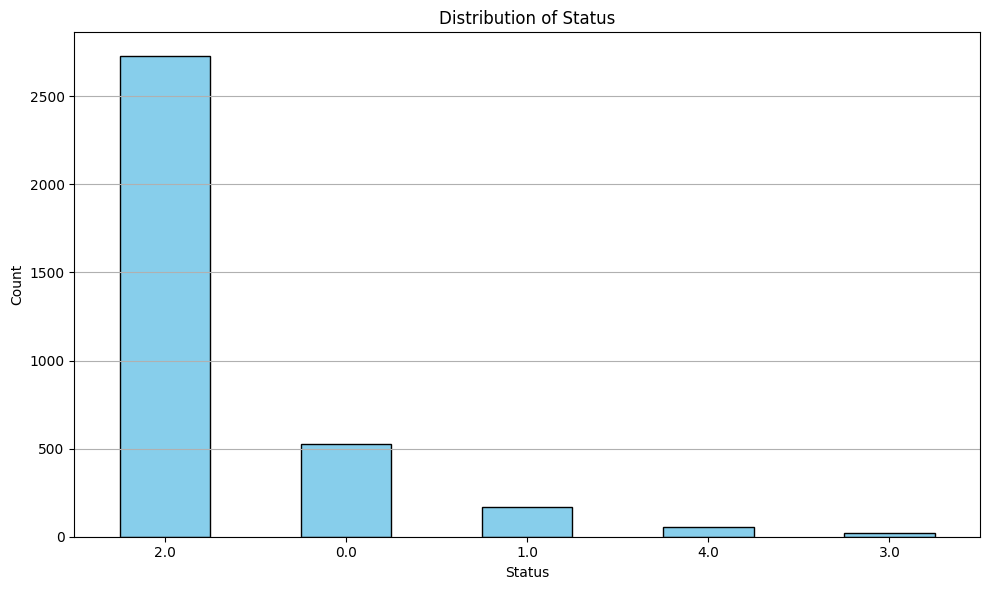

In [21]:
status_counts = df['Status'].value_counts()

plt.figure(figsize=(10, 6))
status_counts.plot(kind='bar', color='skyblue', edgecolor='black')
plt.title('Distribution of Status')
plt.xlabel('Status')
plt.ylabel('Count')
plt.xticks(rotation=0)  
plt.grid(axis='y')
plt.tight_layout()

plt.show()

In [22]:
df['Status'].value_counts()


Status
2.0    2727
0.0     526
1.0     167
4.0      54
3.0      22
Name: count, dtype: int64

In [23]:
X = df.drop('Status', axis=1)  
y = df['Status']

In [24]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [25]:
from imblearn.over_sampling import SMOTE
smote = SMOTE(random_state=42)
X_train_smote, y_train_smote = smote.fit_resample(X_train, y_train)

In [26]:
from collections import Counter

print("Original class distribution:", Counter(y_train))
print("SMOTE class distribution:", Counter(y_train_smote))

Original class distribution: Counter({2.0: 1895, 0.0: 375, 1.0: 122, 4.0: 40, 3.0: 15})
SMOTE class distribution: Counter({0.0: 1895, 2.0: 1895, 1.0: 1895, 4.0: 1895, 3.0: 1895})


In [27]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report
from sklearn.metrics import confusion_matrix
import xgboost as xgb
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.svm import SVC
from sklearn.linear_model import SGDClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.neighbors import KNeighborsClassifier

In [28]:
model = xgb.XGBClassifier()
model.fit(X_train_smote, y_train_smote)

y_pred_xgb = model.predict(X_test)

# Confusion Matrix
conf_matrix_xgb = confusion_matrix(y_test, y_pred_xgb)
print("Confusion Matrix (XGBoost Classifier):")
print(conf_matrix_xgb)

# Accuracy
accuracy_xgb = accuracy_score(y_test, y_pred_xgb)
print("\nAccuracy (XGBoost Classifier):", accuracy_xgb)

# Precision
precision_xgb = precision_score(y_test, y_pred_xgb, average='weighted')  
print("Precision (XGBoost Classifier):", precision_xgb)

# Recall
recall_xgb = recall_score(y_test, y_pred_xgb, average='weighted')  
print("Recall (XGBoost Classifier):", recall_xgb)

# F1 Score
f1_xgb = f1_score(y_test, y_pred_xgb, average='weighted')  
print("F1 Score (XGBoost Classifier):", f1_xgb)

# Print classification report
print("\nClassification Report (XGBoost Classifier):")
print(classification_report(y_test, y_pred_xgb))

Confusion Matrix (XGBoost Classifier):
[[106   0   0   0  45]
 [  0  45   0   0   0]
 [  1   1 830   0   0]
 [  0   0   0   7   0]
 [ 11   0   0   0   3]]

Accuracy (XGBoost Classifier): 0.9447092469018112
Precision (XGBoost Classifier): 0.9719168798160581
Recall (XGBoost Classifier): 0.9447092469018112
F1 Score (XGBoost Classifier): 0.9560179669378995

Classification Report (XGBoost Classifier):
              precision    recall  f1-score   support

         0.0       0.90      0.70      0.79       151
         1.0       0.98      1.00      0.99        45
         2.0       1.00      1.00      1.00       832
         3.0       1.00      1.00      1.00         7
         4.0       0.06      0.21      0.10        14

    accuracy                           0.94      1049
   macro avg       0.79      0.78      0.77      1049
weighted avg       0.97      0.94      0.96      1049



In [29]:
model_etc = ExtraTreesClassifier(random_state=42)
model_etc.fit(X_train_smote, y_train_smote)
y_pred_etc = model_etc.predict(X_test)

# Confusion Matrix
conf_matrix_etc = confusion_matrix(y_test, y_pred_etc)
print("\nConfusion Matrix (Extra Trees Classifier):")
print(conf_matrix_etc)

# Accuracy
accuracy_etc = accuracy_score(y_test, y_pred_etc)
print("\nAccuracy (Extra Trees Classifier):", accuracy_etc)

# Precision
precision_etc = precision_score(y_test, y_pred_etc, average='weighted')  
print("Precision (Extra Trees Classifier):", precision_etc)

# Recall
recall_etc = recall_score(y_test, y_pred_etc, average='weighted')  
print("Recall (Extra Trees Classifier):", recall_etc)

# F1 Score
f1_etc = f1_score(y_test, y_pred_etc, average='weighted')  
print("F1 Score (Extra Trees Classifier):", f1_etc)

# Classification Report
print("\nClassification Report (Extra Trees Classifier):")
print(classification_report(y_test, y_pred_etc))


Confusion Matrix (Extra Trees Classifier):
[[130   0   0   0  21]
 [  0  45   0   0   0]
 [  0   1 831   0   0]
 [  0   0   0   7   0]
 [ 12   0   0   0   2]]

Accuracy (Extra Trees Classifier): 0.9675881792183031
Precision (Extra Trees Classifier): 0.9747174137793146
Recall (Extra Trees Classifier): 0.9675881792183031
F1 Score (Extra Trees Classifier): 0.9709360166053254

Classification Report (Extra Trees Classifier):
              precision    recall  f1-score   support

         0.0       0.92      0.86      0.89       151
         1.0       0.98      1.00      0.99        45
         2.0       1.00      1.00      1.00       832
         3.0       1.00      1.00      1.00         7
         4.0       0.09      0.14      0.11        14

    accuracy                           0.97      1049
   macro avg       0.80      0.80      0.80      1049
weighted avg       0.97      0.97      0.97      1049



In [30]:
model_svm = SVC(kernel='rbf', random_state=42) 
model_svm.fit(X_train_smote, y_train_smote)
y_pred_svm = model_svm.predict(X_test)

# Confusion Matrix
conf_matrix_svm = confusion_matrix(y_test, y_pred_svm)
print("\nConfusion Matrix (SVM):")
print(conf_matrix_svm)

# Accuracy
accuracy_svm = accuracy_score(y_test, y_pred_svm)
print("\nAccuracy (SVM):", accuracy_svm)

# Precision
precision_svm = precision_score(y_test, y_pred_svm, average='weighted')  
print("Precision (SVM):", precision_svm)

# Recall
recall_svm = recall_score(y_test, y_pred_svm, average='weighted')  
print("Recall (SVM):", recall_svm)

# F1 Score
f1_svm = f1_score(y_test, y_pred_svm, average='weighted') 
print("F1 Score (SVM):", f1_svm)

# Classification Report
print("\nClassification Report (SVM):")
print(classification_report(y_test, y_pred_svm))


Confusion Matrix (SVM):
[[ 13   2   0   0 136]
 [ 11  33   0   1   0]
 [ 25   0   0   6 801]
 [  0   2   0   4   1]
 [  3   0   0   0  11]]

Accuracy (SVM): 0.058150619637750235
Precision (SVM): 0.07682828003877404
Recall (SVM): 0.058150619637750235
F1 Score (SVM): 0.05623485094052404

Classification Report (SVM):
              precision    recall  f1-score   support

         0.0       0.25      0.09      0.13       151
         1.0       0.89      0.73      0.80        45
         2.0       0.00      0.00      0.00       832
         3.0       0.36      0.57      0.44         7
         4.0       0.01      0.79      0.02        14

    accuracy                           0.06      1049
   macro avg       0.30      0.44      0.28      1049
weighted avg       0.08      0.06      0.06      1049



/opt/conda/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/conda/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/conda/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/conda/lib/python3.10/site-packages/sklearn/metrics/_classification.py:13

In [31]:
model_dt = DecisionTreeClassifier(random_state=42)
model_dt.fit(X_train_smote, y_train_smote)
y_pred_dt = model_dt.predict(X_test)

# Confusion Matrix
conf_matrix_dt = confusion_matrix(y_test, y_pred_dt)
print("Confusion Matrix (Decision Tree):")
print(conf_matrix_dt)

# Accuracy
accuracy_dt = accuracy_score(y_test, y_pred_dt)
print("\nAccuracy (Decision Tree):", accuracy_dt)

# Precision
precision_dt = precision_score(y_test, y_pred_dt, average='weighted')  
print("Precision (Decision Tree):", precision_dt)

# Recall
recall_dt = recall_score(y_test, y_pred_dt, average='weighted')  
print("Recall (Decision Tree):", recall_dt)

# F1 Score
f1_dt = f1_score(y_test, y_pred_dt, average='weighted')  
print("F1 Score (Decision Tree):", f1_dt)

# Classification Report
print("\nClassification Report (Decision Tree):")
print(classification_report(y_test, y_pred_dt))

Confusion Matrix (Decision Tree):
[[120   0   2   0  29]
 [  0  45   0   0   0]
 [ 18   1 808   0   5]
 [  0   0   0   7   0]
 [ 10   0   0   0   4]]

Accuracy (Decision Tree): 0.9380362249761678
Precision (Decision Tree): 0.9579347328748706
Recall (Decision Tree): 0.9380362249761678
F1 Score (Decision Tree): 0.9472728085847044

Classification Report (Decision Tree):
              precision    recall  f1-score   support

         0.0       0.81      0.79      0.80       151
         1.0       0.98      1.00      0.99        45
         2.0       1.00      0.97      0.98       832
         3.0       1.00      1.00      1.00         7
         4.0       0.11      0.29      0.15        14

    accuracy                           0.94      1049
   macro avg       0.78      0.81      0.79      1049
weighted avg       0.96      0.94      0.95      1049



In [32]:
model_rf = RandomForestClassifier(random_state=42)
model_rf.fit(X_train_smote, y_train_smote)
y_pred_rf = model_rf.predict(X_test)

# Confusion Matrix
conf_matrix_rf = confusion_matrix(y_test, y_pred_rf)
print("Confusion Matrix (Random Forest):")
print(conf_matrix_rf)

# Accuracy
accuracy_rf = accuracy_score(y_test, y_pred_rf)
print("\nAccuracy (Random Forest):", accuracy_rf)

# Precision
precision_rf = precision_score(y_test, y_pred_rf, average='weighted')  
print("Precision (Random Forest):", precision_rf)

# Recall
recall_rf = recall_score(y_test, y_pred_rf, average='weighted')  
print("Recall (Random Forest):", recall_rf)

# F1 Score
f1_rf = f1_score(y_test, y_pred_rf, average='weighted') 
print("F1 Score (Random Forest):", f1_rf)

# Classification Report
print("\nClassification Report (Random Forest):")
print(classification_report(y_test, y_pred_rf))

Confusion Matrix (Random Forest):
[[128   0   0   0  23]
 [  0  45   0   0   0]
 [  1   0 830   0   1]
 [  0   0   0   7   0]
 [ 11   0   0   0   3]]

Accuracy (Random Forest): 0.9656816015252622
Precision (Random Forest): 0.9757985685535733
Recall (Random Forest): 0.9656816015252622
F1 Score (Random Forest): 0.9703394328797703

Classification Report (Random Forest):
              precision    recall  f1-score   support

         0.0       0.91      0.85      0.88       151
         1.0       1.00      1.00      1.00        45
         2.0       1.00      1.00      1.00       832
         3.0       1.00      1.00      1.00         7
         4.0       0.11      0.21      0.15        14

    accuracy                           0.97      1049
   macro avg       0.81      0.81      0.80      1049
weighted avg       0.98      0.97      0.97      1049



In [33]:
# Logistic Regression
model_lr = LogisticRegression(random_state=42, max_iter=1000)
model_lr.fit(X_train_smote, y_train_smote)
y_pred_lr = model_lr.predict(X_test)

# Confusion Matrix
conf_matrix_lr = confusion_matrix(y_test, y_pred_lr)
print("Confusion Matrix (Logistic Regression):")
print(conf_matrix_lr)

# Accuracy
accuracy_lr = accuracy_score(y_test, y_pred_lr)
print("\nAccuracy (Logistic Regression):", accuracy_lr)

# Precision
precision_lr = precision_score(y_test, y_pred_lr, average='weighted') 
print("Precision (Logistic Regression):", precision_lr)

# Recall
recall_lr = recall_score(y_test, y_pred_lr, average='weighted') 
print("Recall (Logistic Regression):", recall_lr)

# F1 Score
f1_lr = f1_score(y_test, y_pred_lr, average='weighted')  
print("F1 Score (Logistic Regression):", f1_lr)

# Classification Report
print("\nClassification Report (Logistic Regression):")
print(classification_report(y_test, y_pred_lr))

Confusion Matrix (Logistic Regression):
[[ 37   7  75  20  12]
 [  0  44   0   1   0]
 [187   7 512  76  50]
 [  1   2   0   4   0]
 [  5   0   5   4   0]]

Accuracy (Logistic Regression): 0.5691134413727359
Precision (Logistic Regression): 0.7408251082765113
Recall (Logistic Regression): 0.5691134413727359
F1 Score (Logistic Regression): 0.634732606801952

Classification Report (Logistic Regression):
              precision    recall  f1-score   support

         0.0       0.16      0.25      0.19       151
         1.0       0.73      0.98      0.84        45
         2.0       0.86      0.62      0.72       832
         3.0       0.04      0.57      0.07         7
         4.0       0.00      0.00      0.00        14

    accuracy                           0.57      1049
   macro avg       0.36      0.48      0.36      1049
weighted avg       0.74      0.57      0.63      1049



In [34]:
model_sgd = SGDClassifier(random_state=42)
model_sgd.fit(X_train_smote, y_train_smote)
y_pred_sgd = model_sgd.predict(X_test)

# Confusion Matrix
conf_matrix_sgd = confusion_matrix(y_test, y_pred_sgd)
print("Confusion Matrix (SGD Classifier):")
print(conf_matrix_sgd)

# Accuracy
accuracy_sgd = accuracy_score(y_test, y_pred_sgd)
print("\nAccuracy (SGD Classifier):", accuracy_sgd)

# Precision
precision_sgd = precision_score(y_test, y_pred_sgd, average='weighted')  
print("Precision (SGD Classifier):", precision_sgd)

# Recall
recall_sgd = recall_score(y_test, y_pred_sgd, average='weighted')  
print("Recall (SGD Classifier):", recall_sgd)

# F1 Score
f1_sgd = f1_score(y_test, y_pred_sgd, average='weighted') 
print("F1 Score (SGD Classifier):", f1_sgd)

# Classification Report
print("\nClassification Report (SGD Classifier):")
print(classification_report(y_test, y_pred_sgd))

Confusion Matrix (SGD Classifier):
[[  0   0 151   0   0]
 [  0   0  45   0   0]
 [  0   0 832   0   0]
 [  0   0   7   0   0]
 [  0   0  14   0   0]]

Accuracy (SGD Classifier): 0.7931363203050524
Precision (SGD Classifier): 0.6290652225870388
Recall (SGD Classifier): 0.7931363203050524
F1 Score (SGD Classifier): 0.7016368086058518

Classification Report (SGD Classifier):
              precision    recall  f1-score   support

         0.0       0.00      0.00      0.00       151
         1.0       0.00      0.00      0.00        45
         2.0       0.79      1.00      0.88       832
         3.0       0.00      0.00      0.00         7
         4.0       0.00      0.00      0.00        14

    accuracy                           0.79      1049
   macro avg       0.16      0.20      0.18      1049
weighted avg       0.63      0.79      0.70      1049



/opt/conda/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/conda/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/conda/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/conda/lib/python3.10/site-packages/sklearn/metrics/_classification.py:13

In [35]:
model_knn = KNeighborsClassifier(n_neighbors=5)  

model_knn.fit(X_train_smote, y_train_smote)

# Make predictions on test data
y_pred_knn = model_knn.predict(X_test)

# Confusion matrix
conf_matrix_knn = confusion_matrix(y_test, y_pred_knn)
print("Confusion Matrix (KNN):")
print(conf_matrix_knn)

# Accuracy
accuracy_knn = accuracy_score(y_test, y_pred_knn)
print("\nAccuracy (KNN):", accuracy_knn)

# Precision
precision_knn = precision_score(y_test, y_pred_knn, average='weighted')
print("Precision (KNN):", precision_knn)

# Recall
recall_knn = recall_score(y_test, y_pred_knn, average='weighted')
print("Recall (KNN):", recall_knn)

# F1 Score
f1_knn = f1_score(y_test, y_pred_knn, average='weighted')
print("F1 Score (KNN):", f1_knn)

# Classification Report
class_report_knn = classification_report(y_test, y_pred_knn)
print("\nClassification Report (KNN):\n", class_report_knn)

Confusion Matrix (KNN):
[[ 74   4  35   6  32]
 [  0  41   0   4   0]
 [208   4 460   7 153]
 [  1   0   0   6   0]
 [  6   0   3   0   5]]

Accuracy (KNN): 0.5586272640610105
Precision (KNN): 0.8074604245187172
Recall (KNN): 0.5586272640610105
F1 Score (KNN): 0.6377991417942139

Classification Report (KNN):
               precision    recall  f1-score   support

         0.0       0.26      0.49      0.34       151
         1.0       0.84      0.91      0.87        45
         2.0       0.92      0.55      0.69       832
         3.0       0.26      0.86      0.40         7
         4.0       0.03      0.36      0.05        14

    accuracy                           0.56      1049
   macro avg       0.46      0.63      0.47      1049
weighted avg       0.81      0.56      0.64      1049

